In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv('hotel_bookings.csv')

# About the functions
This set of functions will take all variable in your dataset and produce several plot types ( such as boxplot, barchart and density plots) against a variable of intereset, in this particular case that variable ideally will have 2 levels such as one or zero. This can be very useful to quickly understand the relation between your variables and a variable of interest, in case of modeling this can be very insighful as we can see of a variable (continous or discrete) have difference in its value when we split them with respect to a variable of interest, we may use variable with different patterns as predictors.


All functions have two parameters but you can add more to customize the values/ visualizations even more. Below you can see a brief description of the parameters:



**dataframe**: Data to be analyzed, format has to be dataframe.

**target_variable**: All plots will be created against this variable, ideally, this variable may have between 2-5 levels, greater levels may create confusion to interpretate/visualize the results.

# Bivariate boxplot

In [7]:
colors = ["#CC0000", "#830137"]
sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF','axes.grid' : False})
sns.set_palette(sns.color_palette(colors))
def biv_boxplot(dataframe,target_variable):
    fig,ax=plt.subplots()
    dataframe=dataframe.select_dtypes(exclude="object").copy()
    dataframe[target_variable]=dataframe[target_variable]
    for i in range(0,len(dataframe.columns)):
        current_col=dataframe.columns[i]
        if current_col!=target_variable:
            sns.boxplot(x=dataframe[target_variable],y=dataframe[current_col])
            plt.title("Bivariate Histogram")
            plt.xlabel(target_variable)
            plt.show()

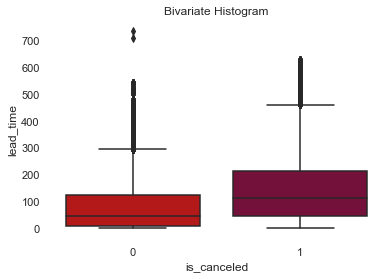

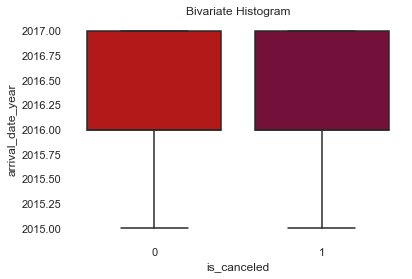

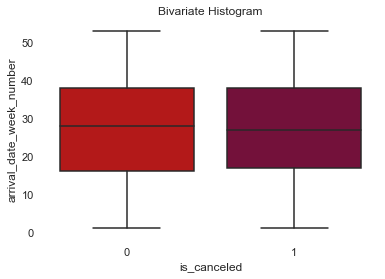

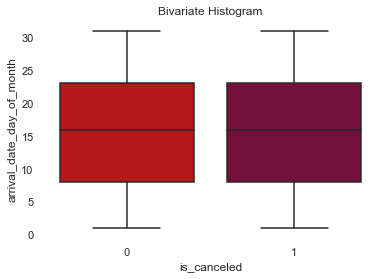

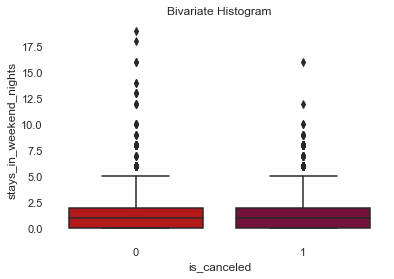

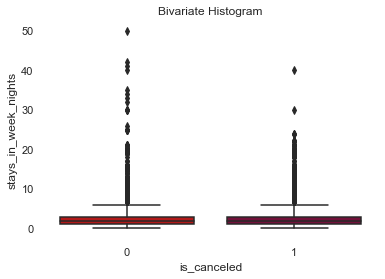

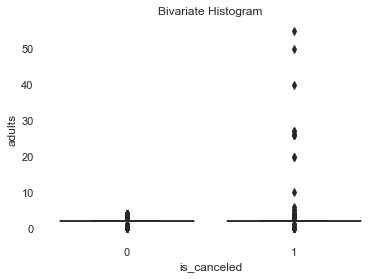

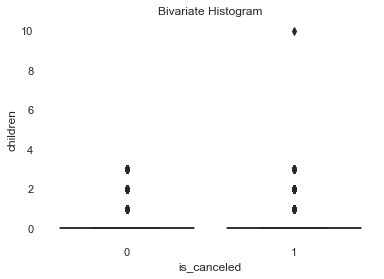

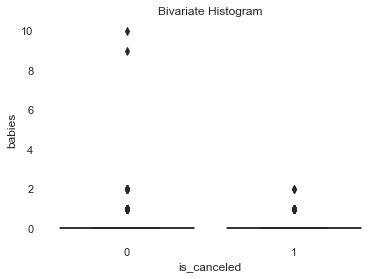

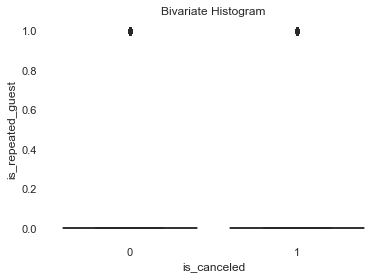

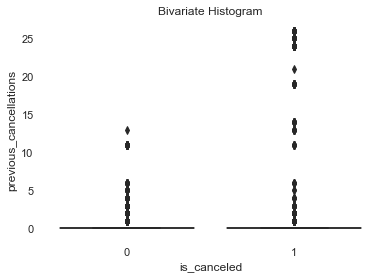

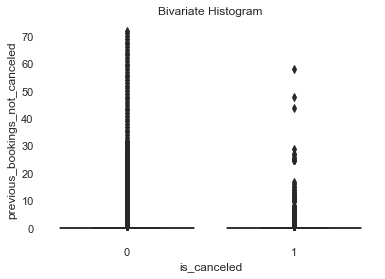

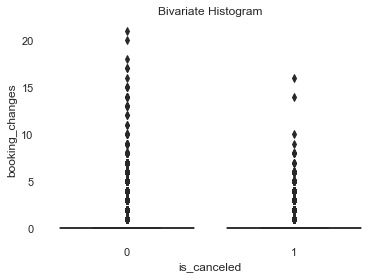

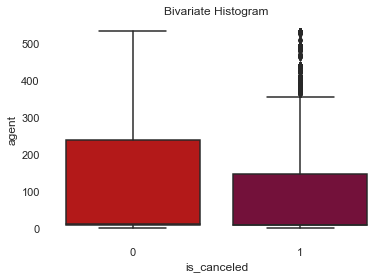

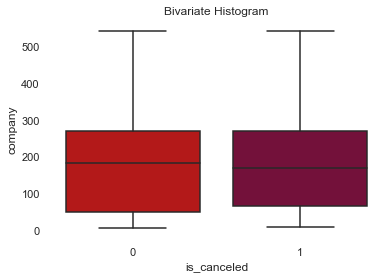

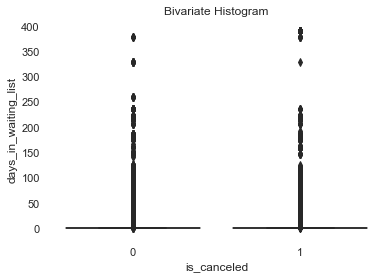

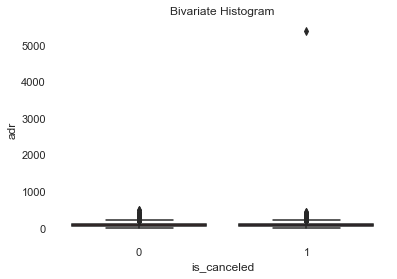

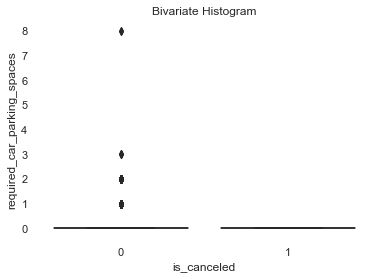

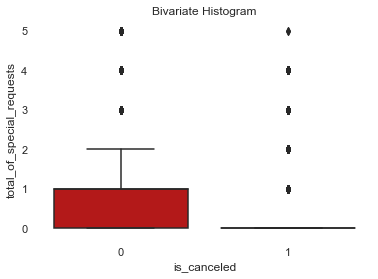

In [8]:
biv_boxplot(test,'is_canceled')

# Density plot

In [9]:
colors = ["#CC0000", "#830137"]
sns.set(rc={'axes.facecolor':'#DAEDFA', 'figure.facecolor':'#DAEDFA','axes.grid' : False})
sns.set_palette(sns.color_palette(colors))
def biv_densityplot(dataframe,target_variable):
    num_data=dataframe._get_numeric_data()
    num_data[target_variable] = dataframe[target_variable].apply(str)
    for i in range(0,len(num_data.columns)):
        current_col=num_data.columns[i]
        if current_col!=target_variable:
            fig,ax=plt.subplots()
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            sns.kdeplot(data=num_data,x=current_col,hue=target_variable,fill=True,shade=True,multiple='stack')
            plt.xlabel(current_col)
            ax.set_ylabel('') 
            plt.show()

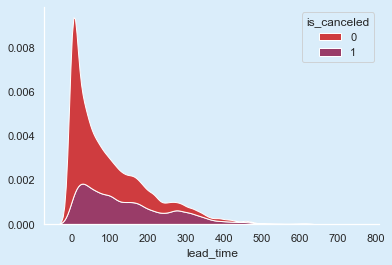

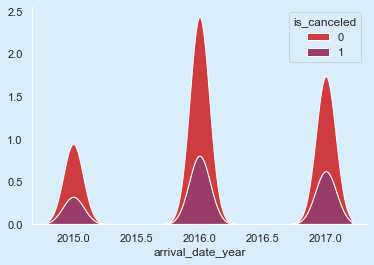

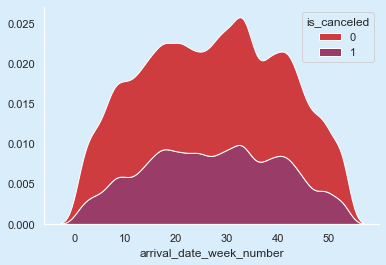

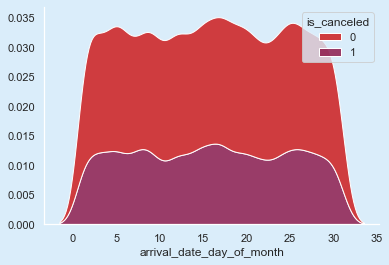

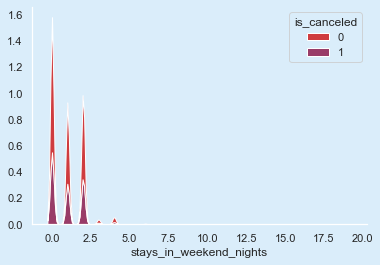

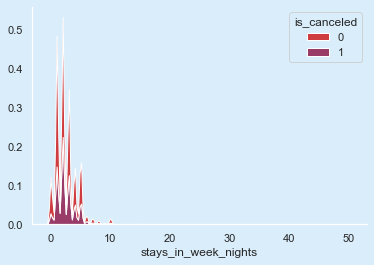

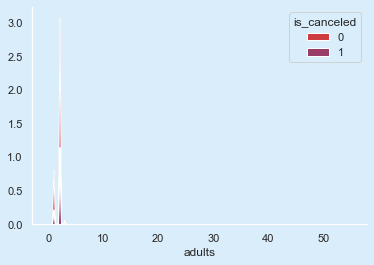

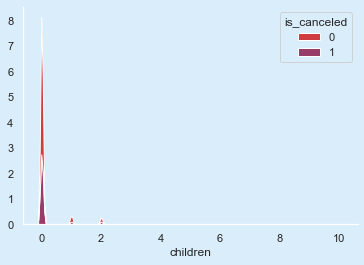

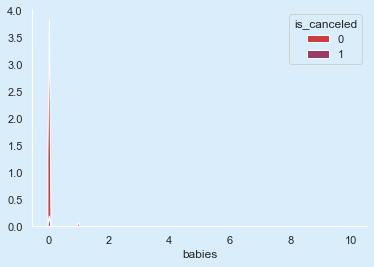

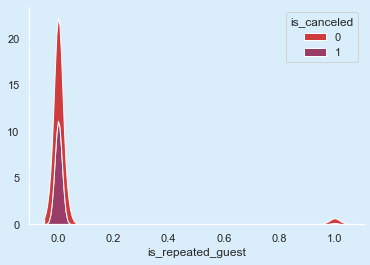

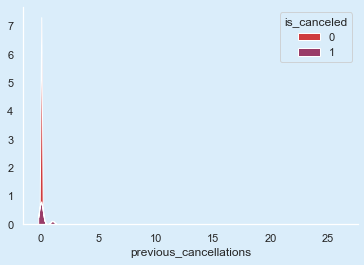

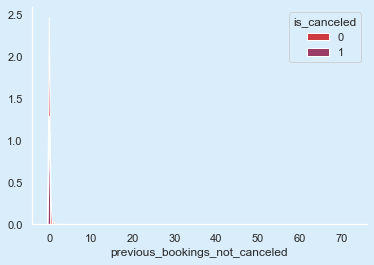

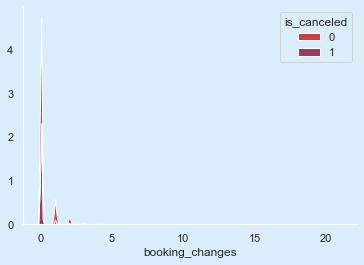

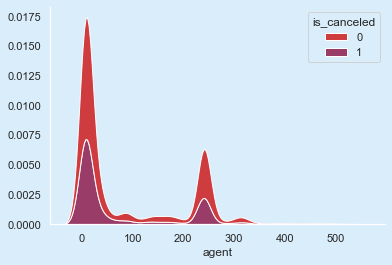

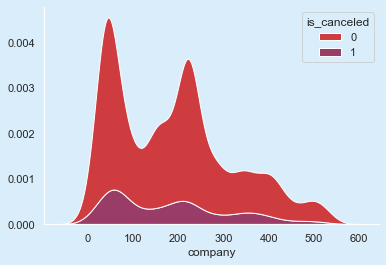

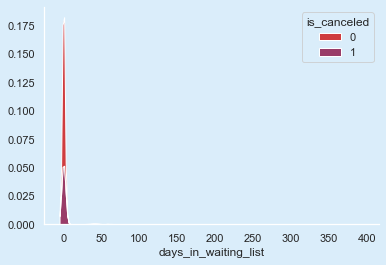

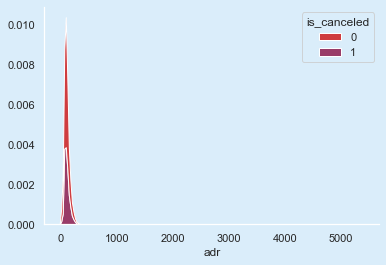

c:\users\hrcsl\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


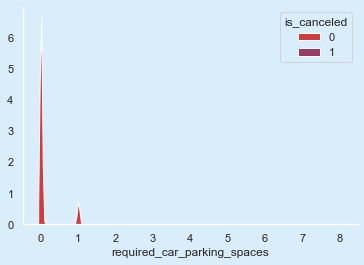

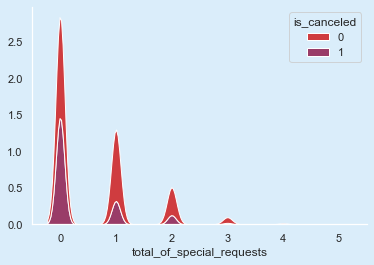

In [10]:
biv_densityplot(test,'is_canceled')

# Barchart

In [14]:
colors = ["#CC0000", "#830137"]
sns.set(rc={'axes.facecolor':'#DAEDFA', 'figure.facecolor':'#DAEDFA','axes.grid' : False})
sns.set_palette(sns.color_palette(colors))
def biv_barchart(dataframe,target_variable):
    obj_data=dataframe.select_dtypes(include="object").copy()
    obj_data[target_variable] = dataframe[target_variable].apply(str)
    for i in range(0,len(obj_data.columns)):
        current_col=obj_data.columns[i]
        if current_col!=target_variable:
            fig,ax=plt.subplots()
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            sns.countplot(data=obj_data,x=current_col,hue=target_variable,fill=True,order=obj_data[current_col].value_counts().iloc[:5].index)
            plt.xlabel(current_col)
            plt.show()

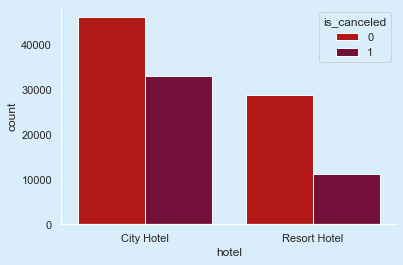

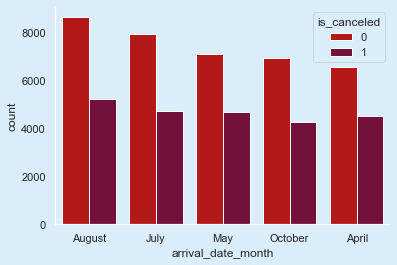

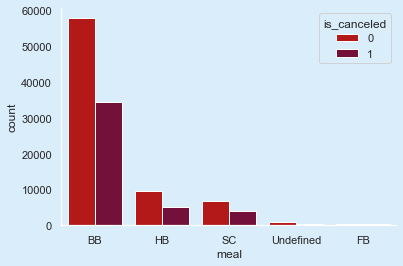

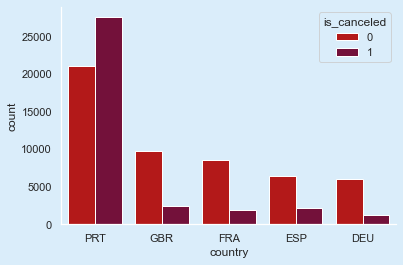

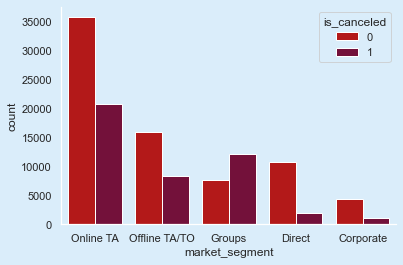

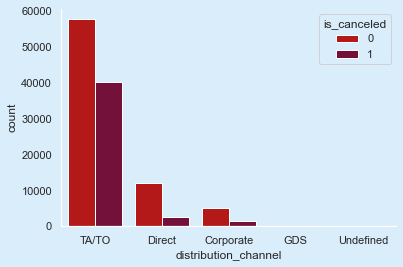

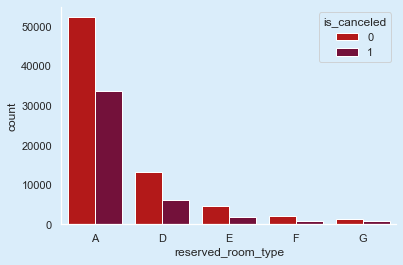

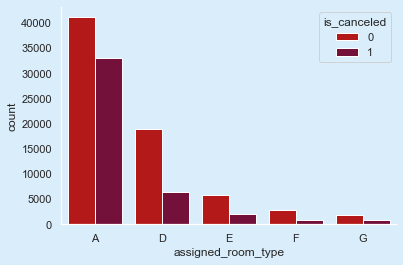

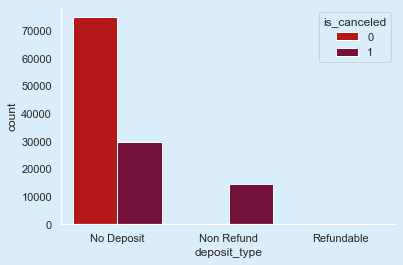

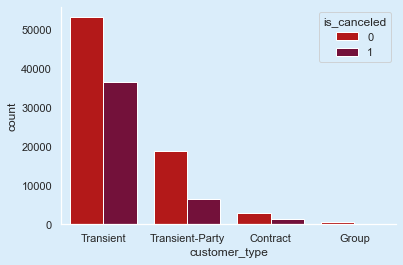

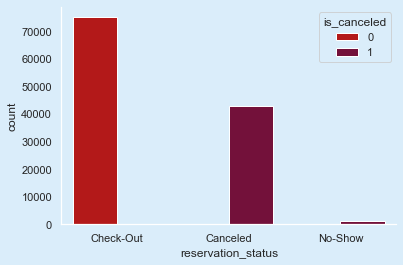

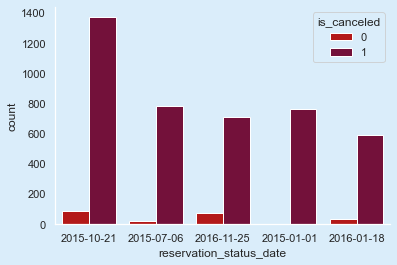

In [15]:
biv_barchart(test,'is_canceled')